In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, f_oneway, shapiro, levene, kruskal, chi2_contingency, pearsonr, spearmanr, zscore, norm
from statsmodels.graphics.gofplots import qqplot
from sklearn.impute import SimpleImputer

In [2]:
df=pd.read_csv('stroke_prediction.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

only Bmi has null value

In [5]:
df.bmi.value_counts()

bmi
28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: count, Length: 418, dtype: int64

Bmi is a continuos column

In [6]:
df.stroke.value_counts()

stroke
0    4861
1     249
Name: count, dtype: int64

Stroke is a categorical column

In [23]:
df.bmi.max(), df.bmi.min()

(97.6, 10.3)

In [24]:
np.linspace(10.3, 97.6, 4)

array([10.3, 39.4, 68.5, 97.6])

In [25]:
#checking whether bmi is dependent on stroke or not
bins=[10.3, 39.4, 68.5, 97.6]
group=['low', 'medium', 'high']
df['bmi_grp']=pd.cut(df.bmi, bins, labels=group)

In [26]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_grp
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,low
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,NaN
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,low
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,low
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,low


In [28]:
stat, pval, dof, exp_freq=chi2_contingency(pd.crosstab(df.bmi_grp, df.stroke))
if pval<0.05:
    print('There is an association between them')
else:
    print('there is no association')

there is no association


In [33]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [41]:
df.bmi.fillna(28.10, inplace=True)

In [42]:
df.bmi.isnull().sum()

0

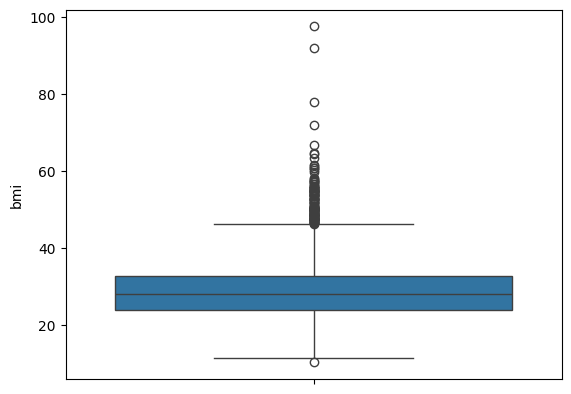

In [46]:
sns.boxplot(df.bmi);

Bmi has outliners

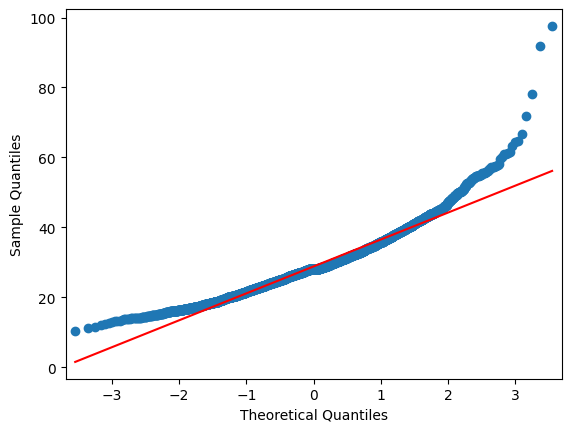

In [49]:
#Checking whether bmi is gausian or not
qqplot(df.bmi, line='s');

In [50]:
shapiro(df.bmi.sample(100))

ShapiroResult(statistic=0.9701178072337628, pvalue=0.02256869175729765)

pvalue > 0.05, it is gausian. But upon checking the QQ-Plot, the graph still shows some values which are not with reference line and outside between -3 and 3.

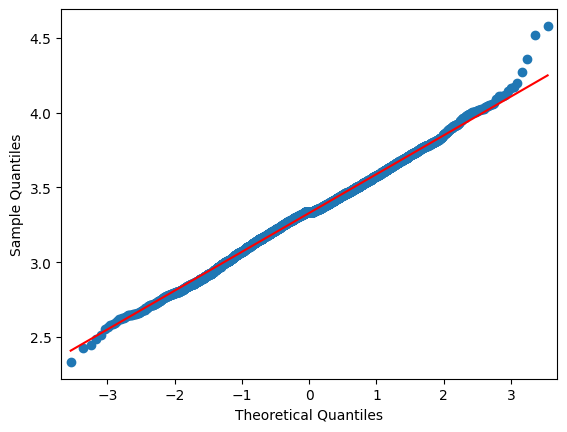

In [51]:
qqplot(np.log(df.bmi), line='s');

Treating with log method, put it close to Perfect Gausian and the data that is outside the (-3, 3) range are not incline so we can drop them using Z-Score method

In [54]:
np.abs(zscore(np.log(df.bmi)))

0       1.044503
1       0.027170
2       0.587154
3       0.805868
4       0.579952
          ...   
5105    0.027170
5106    1.386456
5107    0.355262
5108    0.331513
5109    0.242332
Name: bmi, Length: 5110, dtype: float64

In [55]:
df['treated_bmi']=zscore(np.log(df.bmi))
df=df[np.abs(df.treated_bmi)<3]

TypeError: 'tuple' object is not callable

In [56]:
df.shape

(5093, 14)

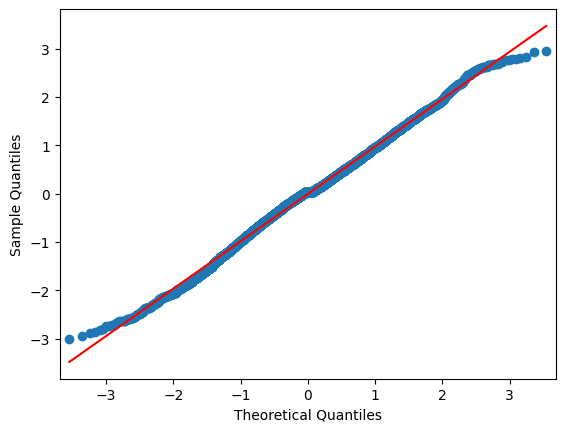

In [58]:
qqplot(df.treated_bmi, line='s');

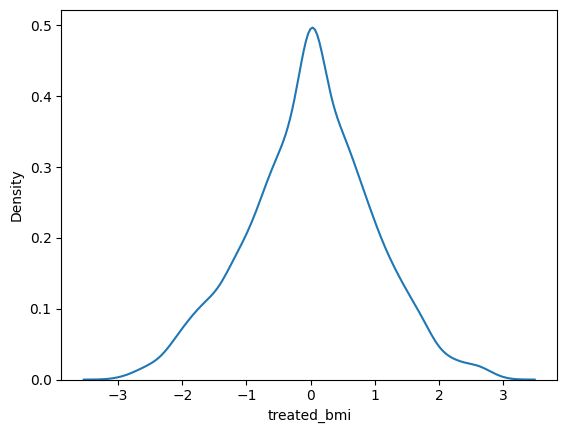

In [59]:
sns.kdeplot(df.treated_bmi);

In [60]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,bmi_grp,treated_bmi
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,low,1.044503
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1,NaN,0.027170
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,low,0.587154
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,low,0.805868
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,low,-0.579952


In [61]:
np.exp(1.044503)

2.8419857056998565

In [65]:
np.exp(norm.cdf(1.044503))

2.344034603117101